# Be central!

I'll give each one of you 5 outgoing edges and 2 incoming edges. Multi-edges are not allowed. There should be only one edge with the same origin and target. The goal is to negotiate with others so that you have the highest centralities. 

There are four challenges:

- In-degree
- PageRank
- Betweenness centrality
- Closeness centrality

The name of your node is your first name (lowercase). 

In [8]:
firstnames = []

edge_str = """
xx yy
zz yy
yy aa
"""

edge_list = [x.split() for x in edge_str.strip().splitlines()]
edge_list

[['xx', 'yy'], ['zz', 'yy'], ['yy', 'aa']]

In [9]:
import networkx as nx
G = nx.DiGraph(edge_list)
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 4
Number of edges: 3
Average in degree:   0.7500
Average out degree:   0.7500


# Consistency test

In [23]:
# namespace test
for u,v in edge_list:
    if u not in firstnames or v not in firstnames:
        print('{}, {}: some names are wrong'.format(u, v))

xx, yy: some names are wrong
zz, yy: some names are wrong
yy, aa: some names are wrong


# In-degree

In [22]:
for n, deg in sorted(G.in_degree(), key=lambda x: x[1], reverse=True):
    print('{:<10} {:<10}'.format(n, deg))

yy         2         
aa         1         
xx         0         
zz         0         


# PageRank

In [26]:
pr = nx.pagerank(G)
for n, p in sorted(pr.items(), key=lambda x: x[1], reverse=True):
    print('{:<10} {:f}'.format(n, p))

aa         0.412133
yy         0.337711
xx         0.125078
zz         0.125078


# Betweenness centrality

In [27]:
betw = nx.algorithms.betweenness_centrality(G)
for n, b in sorted(betw.items(), key=lambda x: x[1], reverse=True):
    print('{:<10} {:f}'.format(n, b))

yy         0.333333
xx         0.000000
zz         0.000000
aa         0.000000


# Closeness centrality

In [28]:
cl = nx.algorithms.closeness_centrality(G)
for n, c in sorted(cl.items(), key=lambda x: x[1], reverse=True):
    print('{:<10} {:f}'.format(n, c))

yy         0.666667
aa         0.600000
xx         0.000000
zz         0.000000


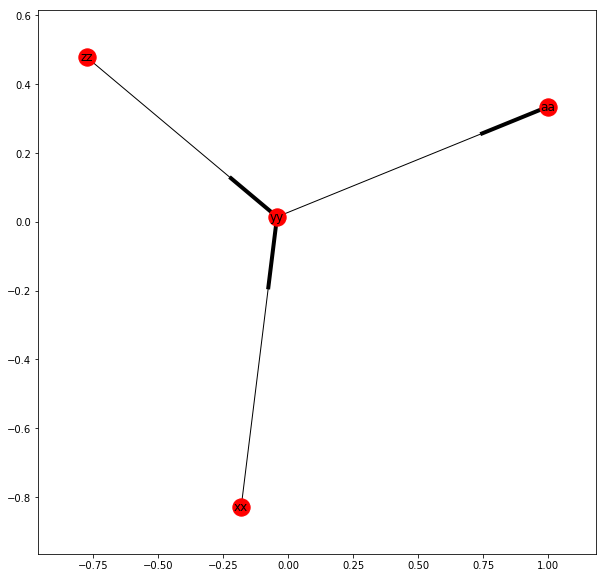

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.figure(figsize=(10,10))
nx.draw_networkx(G, with_labels=True)